# Homework set 4

Please **submit this Jupyter notebook through Canvas** no later than **Monday December 9, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. On canvas there are hints about creating a nice pdf version.**

Before you hand in, please make sure the notebook runs, by running "Restart kernel and run all cells..." from the Kernel menu.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Michael MacFarlane Glasow - 12317217

Wessel Beumer - 12640662

Run the following cell to import NumPy, Matplotlib. If anything else is needed you can import this yourself.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Exercise 1
N.B.1. you are to implement the methods yourself.

N.B.2. Tentative distribution of points is 2+1+2+2+2 points (plus 1 point makes 10).

Given a function $f$, let $T(f,a,b,m)$ denote the composite trapezoid rule with $m$ subintervals over the interval $[a,b]$. 

## (a)
Approximate the integral of $x^{-3}$ over $[a,b] = [ \frac{1}{10}, 100 ]$ by the composite trapezoid rule $T(f,a,b,m)$ for $m = 2^k$. Plot the absolute approximation error for different values of $k$. Find the smallest $k$ such that the exact error is less than $\epsilon = 10^{-3}$. Explain the slow convergence.

18
49.99997269190868


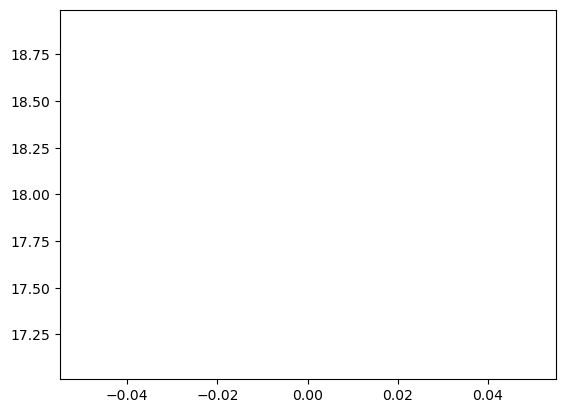

In [ ]:
def x_to_the_minus_third(x):
    return x**-3

def composite_trapezoid_rule(f, a, b, m, tol=1e-3):
    h = (b - a) / m
    x = np.linspace(a, b, m+1)
    y = f(x)
    approx = h * (y[0] + y[-1] + 2 * np.sum(y[1:-1])) / 2
    return approx
a = 1/10
b = 100.0
k = 20
m = 2**k 
# approximate x**-3 by the composite tropezoid rule 
# over a, b = 1/10, 100
# for m = 2**k

def k_convergence(f, a, b, k, true_answer=50):
    error = []
    for i in range(k):
        m = 2**i
        approx = composite_trapezoid_rule(f, a, b, m)
        error.append(abs(approx - true_answer))
        if abs(approx - true_answer) < 1e-3:
            return i
    return error
# find the smallest k such that the exact error is less than 1e-3

error = k_convergence(x_to_the_minus_third, a, b, k)
sol = composite_trapezoid_rule(x_to_the_minus_third, a, b, m)
print(error)
print(sol)
# plot the absolute approximation for different values of k
plt.plot(error)
plt.show()  


# explain the convergence



## (b)

To improve the convergence rate of the above problem, we may use an adaptive strategy, as discussed in the book and the lecture. Consider the following formulas for approximate integration
$$I_1(f,a,b) = T(f,a,b,1)$$
$$I_2(f,a,b) = T(f,a,b,2).$$
Show, based on the precise error estimates for the trapezoid rule from the book/lecture that the error in $I_2$ can be estimated by a formula of the form 
$$E_2 = C (I_1 - I_2)$$
and determine the constant $C$ (if you can't find $C$, you may take $C = 0.5$).

## (c)
An adaptive strategy for computing the integral on an interval $[a,b]$ now is: Compute $I_2$ and $E_2$, and accept $I_2$ as an approximation when the estimated error $E_2$ is less or equal than a desired tolerance $\epsilon$.  Otherwise, apply the procedure to 
$\int_a^{\frac{b+a}{2}} f(x) \, dx$ and $\int_{\frac{b+a}{2}}^b f(x) \, dx$ with tolerances $\frac{\epsilon}{2}$.

Write a recursive python routine that implements the adaptive strategy.

Then apply this routine to the function $x^{-3}$ with $a, b, \epsilon$ as before. What is the exact error in the obtained approximation? 

## (d)

Modify the code of (c) so that the number of function evaluations is counted. Optimize your implementation such that no unnecessary function evaluations are performed.

Compare the number of function evaluations used in the adaptive strategy of (c) with the result of (a). 
(*Hint*: To count the number of function evaluations, you may use a global variable.)


## (e)
In the course of executing the recursive procedure, some subintervals are refined (split into two subintervals) while others aren't as a result of the choices made by the algorithm. It turns out that the choices made by this algorithm are not always optimal. Other algorithms, that decide in a different way which subinterval needs to be refined, may be more efficient in the sense that they require less function evaluations (while using the same formulas for the approximate integral and the approximate error associated with a subinterval).

Can you explain why this is the case? Devise an alternative, non-recursive algorithm that addresses this issue and should to lead a more efficient integral computation. Describe your approach and algorithm in about 5 to 10 sentences (bullet points).
